---
# Análisis Univariado

Es la forma más simple de análisis, en donde se estudia cada variable de forma aislada. El propósito principal de un análisis univariado es describir los datos, valiéndose de la estadística descriptiva, para encontrar patrones y develar fenómenos subyacentes difíciles de encontrar solamente observando los datos de forma aislada. Dentro del análisis univariado, es posible aplicar las siguientes medidas para caracterizar un conjunto de datos:

- Medidas de tendencia central
- Medidas de dispersión


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Salaries.csv')

In [3]:
df.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


## Medidas de Tendencia Central
Son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores, representando el centro en torno al cual se sitúan los datos.

* **Media**: corresponde al promedio aritmético, es decir, la suma de los valores dividido por la cantidad de valores.

* **Mediana**: corresponde al valor de la variable que ocupa la posición central en el conjunto de valores, es decir, el 50% de las observaciones tiene un valor igual o inferior a la mediana y el otro 50% un valor igual o superior a la mediana

* **Moda**: corresponde al valor que más se repite en un conjunto de datos

### Media


In [4]:
# media
df['BasePay'].mean()

np.float64(66325.44884048769)

In [5]:
# a la antigua...
s = df['BasePay'].dropna()
sum(s)/len(s)

66325.44884048769

### Mediana

In [6]:
# mediana
df['BasePay'].median()

np.float64(65007.45)

### Moda

In [7]:
# moda
df['BasePay'].mode()

0    0.0
Name: BasePay, dtype: float64

Fíjese que la moda es 0.0 ¿Qué insight podemos levantar?

## Medidas de Dispersión

Entregan información sobre la variación de la variable, en donde se busca resumir en un sólo valor la dispersión que tiene un conjunto de datos.

* **Rango de variación**: es la diferencia entre el mayor valor de la variable y el menor valor.

* **Varianza**: es la suma de las diferencias entre el valor y el promedio, al cuadrado, dividido por la cantidad de valores

* **Desviación Estándar**: corresponde a la raíz cuadrada de la varianza, para que la medida de dispersión quede en la misma unidad que los valores de la variable.


### Rango de Variación

In [8]:
# rango de variación
rv = df['BasePay'].max() - df['BasePay'].min()
print(rv)

319441.02


### Varianza

$Var(x) = \frac{\sum_{i=1}^{n}(x_{i}-\overline{X})^{2})}{n}$

In [9]:
# varianza, por defecto utiliza n - 1 (estimacion de la población a partir de una muestra)
df['BasePay'].var()

np.float64(1828814049.0423548)

In [10]:
# varianza utilizando n (medición de la desviación de la población)
df['BasePay'].var(ddof=0)

np.float64(1828801695.946681)

### Desviación Estándar

$\sigma =\sqrt{\frac{\sum_{i=1}^{n}(x_{i}-\overline{X})^{2})}{n}}$

In [11]:
# desviación estándar, por defecto utiliza n - 1
df['BasePay'].std()

np.float64(42764.635495258866)

In [12]:
# desviación estándar, utilizando n
df['BasePay'].std(ddof=0)

np.float64(42764.491063809946)

## Medidas de Posición

Las medidas de posición son indicadores estadísticos que permiten resumir los datos en uno sólo, o dividir su distribución en intervalos del mismo tamaño. Las medidas más habituales son las siguientes:

* El cuartil: divide la distribución en 4 partes iguales. De esta forma, existen tres cuartiles, Q1, Q2 y Q3.

* El quintil: divide la distribución en 5 partes, por lo tanto hay 4 quintiles.

* El decil: divide la distribución en 10 partes iguales.

* El percentil: divide la distribución en 100 partes iguales.

### Cuartil

In [13]:
# Cálculo de los cuartiles
q1 = df['BasePay'].quantile(q=.25)
q2 = df['BasePay'].quantile(q=.5)
q3 = df['BasePay'].quantile(q=.75)

print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)

Q1: 33588.2
Q2: 65007.45
Q3: 94691.05


### Quintil

In [14]:
# Cálculo de los quintiles
q1 = df['BasePay'].quantile(q=.2)
q2 = df['BasePay'].quantile(q=.4)
q3 = df['BasePay'].quantile(q=.6)
q4 = df['BasePay'].quantile(q=.8)

print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Q1:',q4)

Q1: 21186.274000000005
Q2: 56511.65
Q3: 74119.65999999999
Q1: 103828.37400000001


## Sumario

In [15]:
# sumario de estadísticas
df['BasePay'].describe()

count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

## Diagramas y Visualización
Las visualizaciones permiten lograr un insight de los datos de forma rápida con sólo una mirada. Para esto, existen diversos tipos de gráfico que podemos utilizar. A continuación, algunos ejemplos:

### Histograma

Un histograma permite visualizar la frecuencia de ocurrencia de los distintos valores del conjunto de datos. Esta división se hacer en intervalos regulares entre el valor mínimo y máximo del conjunto.

<Axes: ylabel='Frequency'>

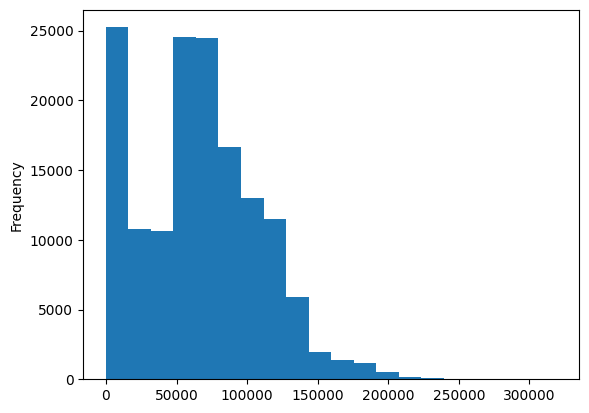

In [16]:
df['BasePay'].plot(kind='hist', bins=20)

<Axes: >

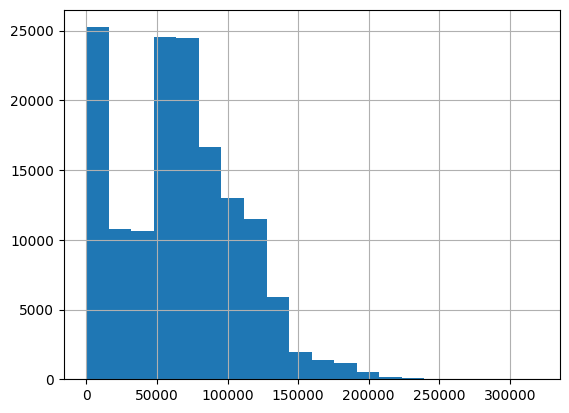

In [17]:
df['BasePay'].hist(bins=20)

### Diagrama de distribución

Un diagrama de distribución estima la función de densidad de probabilidad a partir de un conjunto de datos. (KDE: kernel density estimation)

<Axes: ylabel='Density'>

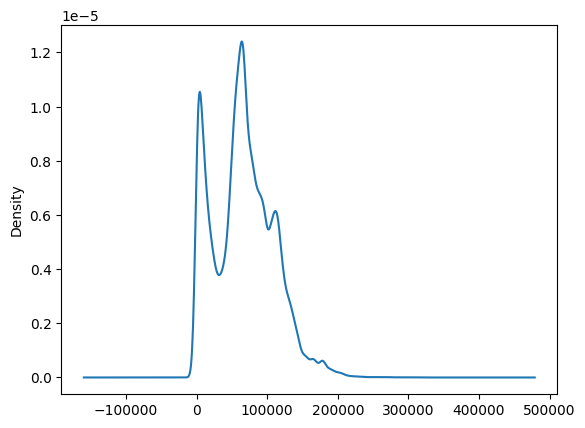

In [18]:
df['BasePay'].plot(kind='kde')

### Diagrama de Caja

El boxplot, o diagrama de caja y bigote, entrega información de cómo se distribuyen los valores en un conjunto de datos, identificando también los cuartiles y puntos atípicos.

<Axes: >

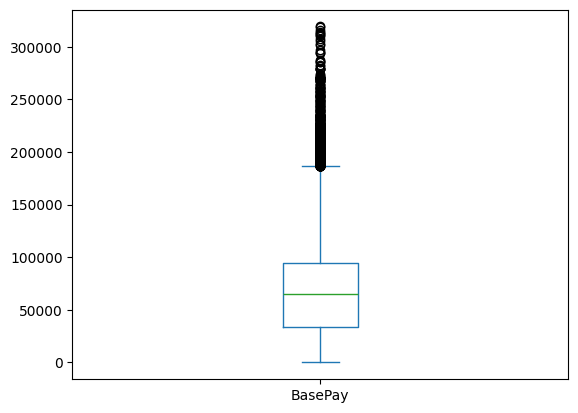

In [19]:
df['BasePay'].plot(kind='box')

#### Diagrama de Dispersión

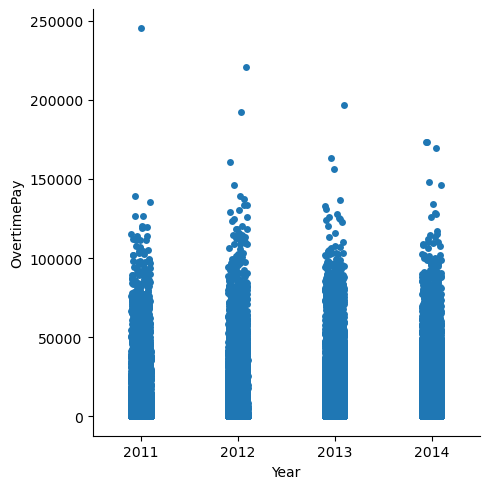

In [27]:
sns.catplot(data=df, y='OvertimePay', x='Year')

In [20]:
df['Agency'].unique()

<StringArray>
['San Francisco']
Length: 1, dtype: str

### Límites de outliers

In [21]:
# Cálculo de los cuartiles q1 y q3
q1 = df['BasePay'].quantile(q=.25)
q3 = df['BasePay'].quantile(q=.75)

# rango intercuartil
iqr = q3 - q1

linf = max(q1 - 1.5*iqr, min(df['BasePay']))
lsup = min(q3 + 1.5*iqr, max(df['BasePay']))

print('LINF', linf)
print('LSUP', lsup)


LINF -166.01
LSUP 186345.325


---